In [1]:
import torchvision
import torch
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor, Normalize
from torchvision import transforms
import torch.optim as optimizer

In [2]:
transforms = transforms.Compose([ToTensor(), Normalize(mean=(.5,), std=(.5,))])
train_data = torchvision.datasets.FashionMNIST('fashion_mnist', download=True, train=True, transform=transforms)
train_data

/opt/homebrew/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:189.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: fashion_mnist
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [3]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True)
train_loader

In [4]:
classes = ("T-Shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot")

(torch.Size([1, 28, 28]), tensor(1.), tensor(-1.))

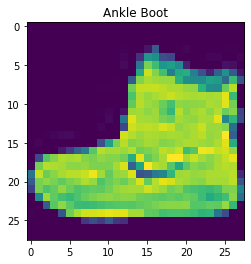

In [5]:
img, label = train_data[0]
plt.imshow(img.squeeze())
plt.title(classes[label])
img.shape, img.max(), img.min()

In [6]:
resnet = torchvision.models.resnet18()
resnet.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
resnet.fc = torch.nn.Linear(512, len(classes))
resnet

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [7]:
optim = optimizer.Adam(resnet.parameters(), lr=3e-4)
loss_fn = torch.nn.CrossEntropyLoss()

running_losses = []
losses = []
for epoch in range(2):
  running_loss = 0.0
  for c, [b, l] in enumerate(train_loader):
    # print(c, b.shape, l.shape)  # torch.Size([4, 1, 28, 28]) torch.Size([4])
    model.train()
    optim.zero_grad()
    outputs = resnet(b)
    loss = loss_fn(outputs, l)
    loss.backward()
    optim.step()
    
    running_loss += loss.item()
    if c % 100 == 99:    # print every 10 mini-batches
      running_losses.append(running_loss / 100)
      losses.append(loss.item())
      print('[%d, %5d] loss: %.3f' % (epoch + 1, c + 1, running_loss / 100))
      running_loss = 0.0


[1,   100] loss: 1.778
[1,   200] loss: 1.381
[1,   300] loss: 1.254
[1,   400] loss: 1.182
[1,   500] loss: 1.183
[1,   600] loss: 1.083
[1,   700] loss: 1.086
[1,   800] loss: 1.051
[1,   900] loss: 1.004
[1,  1000] loss: 0.988
[1,  1100] loss: 0.840
[1,  1200] loss: 0.789
[1,  1300] loss: 0.976
[1,  1400] loss: 0.959
[1,  1500] loss: 0.857
[1,  1600] loss: 0.808
[1,  1700] loss: 0.904
[1,  1800] loss: 0.880
[1,  1900] loss: 0.881
[1,  2000] loss: 0.801
[1,  2100] loss: 0.769
[1,  2200] loss: 0.803
[1,  2300] loss: 0.801
[1,  2400] loss: 0.837
[1,  2500] loss: 0.748
[1,  2600] loss: 0.703
[1,  2700] loss: 0.744
[1,  2800] loss: 0.738
[1,  2900] loss: 0.766
[1,  3000] loss: 0.756
[1,  3100] loss: 0.721
[1,  3200] loss: 0.645
[1,  3300] loss: 0.621
[1,  3400] loss: 0.594
[1,  3500] loss: 0.815
[1,  3600] loss: 0.702
[1,  3700] loss: 0.693
[1,  3800] loss: 0.684
[1,  3900] loss: 0.645
[1,  4000] loss: 0.698
[1,  4100] loss: 0.625
[1,  4200] loss: 0.616
[1,  4300] loss: 0.652
[1,  4400] 

[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument


KeyboardInterrupt: 

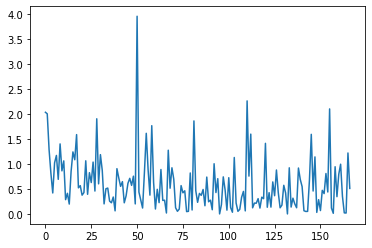

In [8]:
plt.plot(losses)

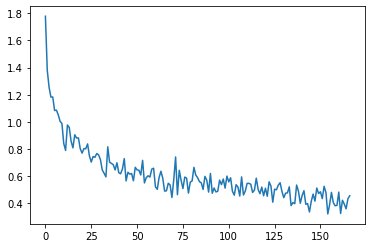

In [40]:
plt.plot(running_losses)

In [11]:
test_data = torchvision.datasets.FashionMNIST('fashion_mnist', download=True, train=False, transform=transforms)
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: fashion_mnist
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [12]:
test_loader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=True)
test_loader

'Coat'

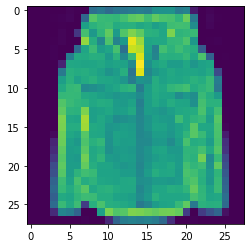

In [64]:
t1 = iter(test_loader).next()
plt.imshow(t1[0][0].squeeze())
classes[t1[1][0]]

In [65]:
with torch.no_grad():
  resnet.eval()
  pred = resnet(t1[0][0].unsqueeze(0)).squeeze()
  print(pred, torch.argmax(pred), classes[torch.argmax(pred)])

tensor([-2.3031, -2.6913,  0.6743, -0.5473,  1.8164, -4.9941,  0.0764, -4.8769,
        -0.7829, -3.8023]) tensor(4) Coat


In [107]:
corr = 0
for i, [X, y] in enumerate(test_loader):
  resnet.eval()
  pred = resnet(X)
  maxes, argmaxes = torch.max(pred, 1)
  corr += torch.count_nonzero(argmaxes == y)
"acc", (corr / len(test_loader.dataset)) * 100

('acc', tensor(84.8800))